In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols
import os
os.chdir("E://TSA-COURSE-NOTEBOOKS/TSA_COURSE_NOTEBOOKS/Data//")
os.getcwd()

'E:\\TSA-COURSE-NOTEBOOKS\\TSA_COURSE_NOTEBOOKS\\Data'

In [2]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

For this analysis we'll also compare money to spending. We'll look at the M2 Money Stock which is a measure of U.S. personal assets, and U.S. personal spending. Both datasets are in billions of dollars, monthly, seasonally adjusted. They span the 21 years from January 1995 to December 2015 (252 records).
Sources: https://fred.stlouisfed.org/series/M2SL https://fred.stlouisfed.org/series/PCE

In [3]:
df = pd.read_csv("M2SLMoneyStock.csv", index_col = 0, parse_dates = True)
df.index.freq = 'MS'
sp = pd.read_csv("PCEPersonalSpending.csv",index_col = 0, parse_dates = True)
sp.index.freq = 'MS'

In [4]:
df.head()

,Money
Date,
1995-01-01,3492.4
1995-02-01,3489.9
1995-03-01,3491.1
1995-04-01,3499.2
1995-05-01,3524.2


In [5]:
sp.head()

,Spending
Date,
1995-01-01,4851.2
1995-02-01,4850.8
1995-03-01,4885.4
1995-04-01,4890.2
1995-05-01,4933.1


In [6]:
##Merging two data sets
df = pd.merge(df,sp,left_index=True, right_index=True)

In [7]:
df.head()

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1


In [8]:
##Dropping null values
df.dropna()

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1
1995-06-01,3548.9,4977.5
1995-07-01,3567.4,4970.2
1995-08-01,3589.0,5005.3
1995-09-01,3602.1,5020.5


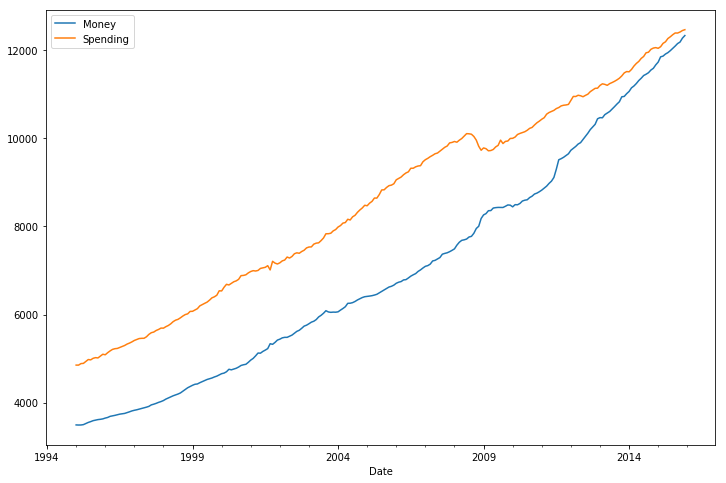

In [9]:
df.plot(figsize=(12,8))

In [10]:
##Test for stationary
result = adfuller(df['Money'],autolag = 'AIC')

In [11]:
result

(4.239022425670653,
 1.0,
 4,
 247,
 {'1%': -3.457105309726321,
  '5%': -2.873313676101283,
  '10%': -2.5730443824681606},
 2219.917877142354)

The result shows ADF test statistics is 4.23, p-value = 1 , lags used = 4, no of observation = 247
Data is non stationary

Since we are dealing with non stationary we will do differencing to transform the dataset

In [12]:
df_transformed = df.diff()

In [13]:
df_transformed.head()

,Money,Spending
Date,,
1995-01-01,NaN,NaN
1995-02-01,-2.5,-0.4
1995-03-01,1.2,34.6
1995-04-01,8.1,4.8
1995-05-01,25.0,42.9


In [14]:
##We will perform second order differencing
df_transformed = df_transformed.diff().dropna()

In [15]:
df_transformed.head()

,Money,Spending
Date,,
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7


In [16]:
result_1 = adfuller(df_transformed['Money'],autolag = 'AIC')

In [17]:
result_1

(-7.0774707943430295,
 4.76067493129575e-10,
 14,
 235,
 {'1%': -3.4584868856997004,
  '5%': -2.873918902362675,
  '10%': -2.573367247623359},
 2217.097202826827)

Train and Test split

In [18]:
##Number of observations
nobs = 12
train = df_transformed[:-nobs]
test = df_transformed[-nobs:]

Perfroming Grid search to get the order for VAR

In [19]:
model = VAR(train)

for p in [1,2,3,4,5,6,7]:
    
    results = model.fit(p)
    print(f'ORDER {p}')
    print(f'AIC: {results.aic}')
    print('\n')

ORDER 1
AIC: 14.178610495220896


ORDER 2
AIC: 13.955189367163703


ORDER 3
AIC: 13.849518291541038


ORDER 4
AIC: 13.827950574458281


ORDER 5
AIC: 13.78730034460964


ORDER 6
AIC: 13.799076756885809


ORDER 7
AIC: 13.79763872791397




In [20]:
var = model.fit(5)

In [21]:
var.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 14, Jan, 2020
Time:                     09:58:34
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.1131
Nobs:                     233.000    HQIC:                   13.9187
Log likelihood:          -2245.45    FPE:                    972321.
AIC:                      13.7873    Det(Omega_mle):         886628.
--------------------------------------------------------------------
Results for equation Money
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.516683         1.782238            0.290           0.772
L1.Money           -0.646232         0.068177           -9.479           0.000
L1.Spending        -0.107411         0.051388           -2.090      

In [22]:
##Grab the last 5 values before the test data set starts because we choose p =5
lagged = train.values[-5:]

In [23]:

z = var.forecast(y = lagged, steps = 12)

Z is the numpy we need to transform it to dataframe

In [24]:
test.head()

,Money,Spending
Date,,
2015-01-01,-15.5,-26.6
2015-02-01,56.1,52.4
2015-03-01,-102.8,39.5
2015-04-01,30.9,-40.4
2015-05-01,-15.8,38.8


In [25]:
idx = pd.date_range('2015-01-01',periods = 12,freq ='MS')

In [26]:
idx

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [27]:
df_forecast = pd.DataFrame(data = z, index = idx, columns = ['Money_2d','Spending_2d'])

In [28]:
df_forecast.head()

,Money_2d,Spending_2d
2015-01-01,-16.995276,36.149820
2015-02-01,-3.174038,-11.450298
2015-03-01,-0.377725,-6.684969
2015-04-01,-2.602233,5.479458
2015-05-01,4.228557,-2.443365


We cannot compare the test and forecast, because we need to reverse the two degrees of differenceing before comparing to the test variables. Because forecasted values represent second order difference. to compare them to original dataset we need to rollback the each difference,

In [30]:
df_forecast['Money1d'] = (df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2]) + df_forecast['Money_2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['MoneyForecast'] = df['Money'].iloc[-nobs-1] + df_forecast['Money1d'].cumsum()

In [31]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Spending1d'] = (df['Spending'].iloc[-nobs-1]-df['Spending'].iloc[-nobs-2]) + df_forecast['Spending_2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['SpendingForecast'] = df['Spending'].iloc[-nobs-1] + df_forecast['Spending1d'].cumsum()

In [32]:
df_forecast.head()

,Money_2d,Spending_2d,Money1d,MoneyForecast,Spending1d,SpendingForecast
2015-01-01,-16.995276,36.149820,61.604724,11731.704724,46.749820,12108.749820
2015-02-01,-3.174038,-11.450298,58.430686,11790.135410,35.299522,12144.049342
2015-03-01,-0.377725,-6.684969,58.052961,11848.188371,28.614552,12172.663894
2015-04-01,-2.602233,5.479458,55.450728,11903.639099,34.094010,12206.757904
2015-05-01,4.228557,-2.443365,59.679285,11963.318384,31.650645,12238.408549


In [33]:
##We are getting the test range from the original data set df
test_range = df[-nobs:]

In [34]:
test_range

,Money,Spending
Date,,
2015-01-01,11733.2,12046.0
2015-02-01,11852.4,12082.4
2015-03-01,11868.8,12158.3
2015-04-01,11916.1,12193.8
2015-05-01,11947.6,12268.1
2015-06-01,11993.1,12308.3
2015-07-01,12045.3,12355.4
2015-08-01,12096.8,12394.0
2015-09-01,12153.8,12392.8


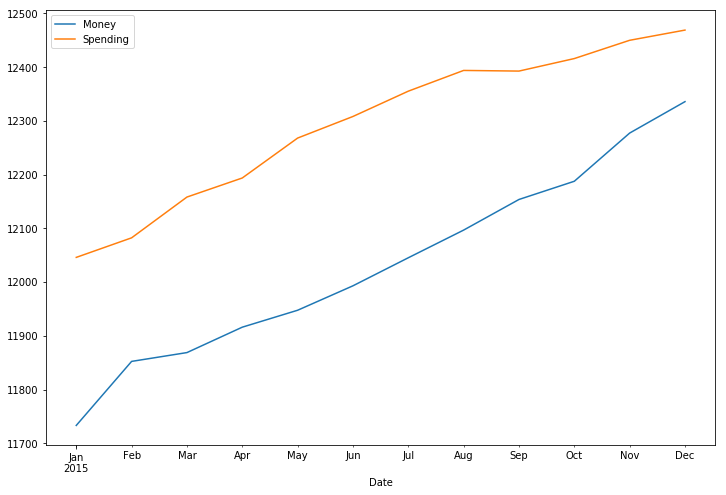

In [35]:
test_range.plot(figsize=(12,8))

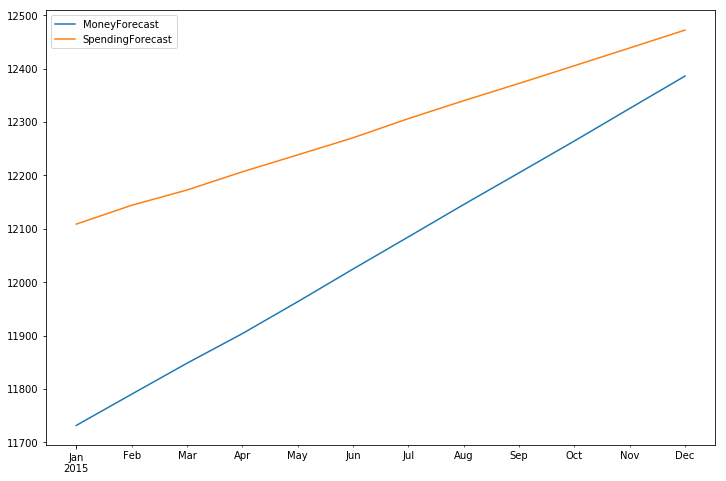

In [36]:
df_forecast[['MoneyForecast','SpendingForecast']].plot(figsize=(12,8))

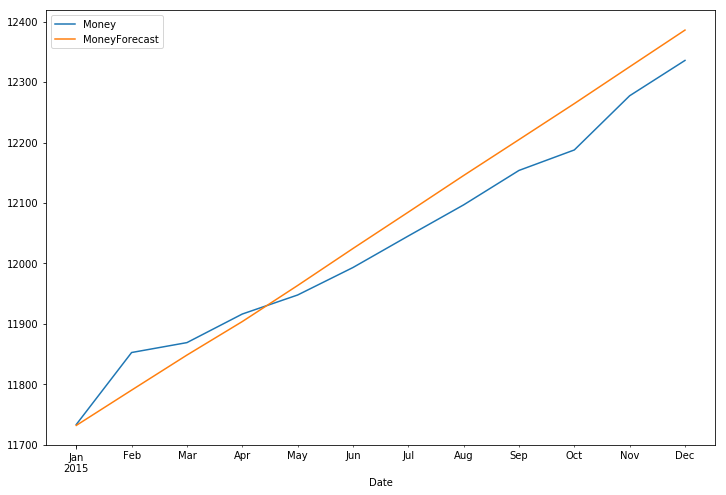

In [39]:
test_range['Money'].plot(legend = True,figsize=(12,8))
df_forecast['MoneyForecast'].plot(legend = True)

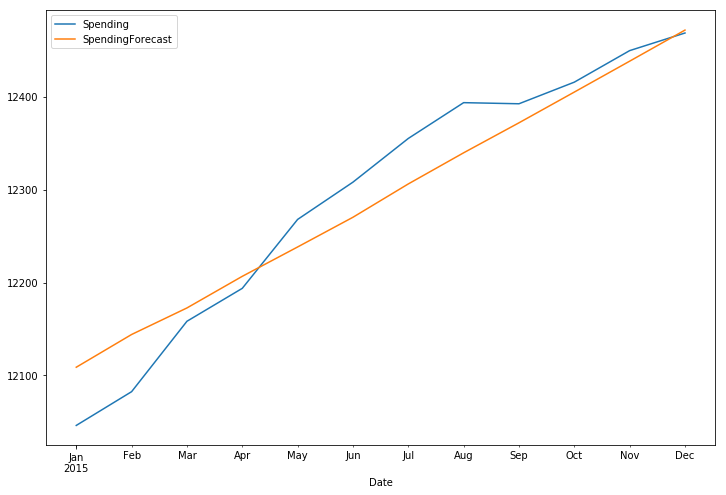

In [40]:
test_range['Spending'].plot(legend = True,figsize=(12,8))
df_forecast['SpendingForecast'].plot(legend = True)

In [41]:
rmse(test_range['Money'],df_forecast['MoneyForecast'])

43.71049653558893

In [42]:
rmse(test_range['Spending'],df_forecast['SpendingForecast'])

37.00117516940808